In [5]:
!pip install numpy pandas matplotlib

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/b7/98/5640a09daa3abf0caeaefa6e7bf0d10c0aa28a77c84e507d6a716e0e23df/numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.7 kB 217.9 kB/s eta 0:00:01
     -------------------------- ----------- 41.0/59.7 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 317.3 kB/s eta 0:00:00
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Определение начальных параметров

In [2]:
Tp = 0.0014
Tk = 0.23
Kp1 = 4
Td = 2
Kd1 = 1

In [3]:
A3 = Tp*Td
A2 = Tp + Tk*Td
A1 = Tk + Td
A0 = 1 + Kp1*Kd1
print(f"{A3 = }, {A2 = }, {A1 = }, {A0 = }")

A3 = 0.0028, A2 = 0.46140000000000003, A1 = 2.23, A0 = 5


## Критерий устойчивости Рауза-Гурвица

In [16]:
# A3p^3 + A2p^2 + A1p + A0 = 0
#Необходимое условие (Все коэффициенты больше 0)
koef = [A3, A2, A1, A0]
print(f"Необходимое условие - {all([x > 0 for x in koef])}")

print('Достаточное условие : ')
# Матрицы Гурвица
G = np.array([[A2, A0, 0], 
     [A3, A1, 0],
     [0, A2, A0]])

check = []
for i in range(1, 4):
     print(f"{i = }")
     cur = G[:i, :i]
     print(f"{cur}")
     det = np.linalg.det(cur)
     print(f"Определитель : {det}")
     check.append(det)
     
print(f"Достаточное условие : {all([det > 0 for det in check])}")

Необходимое условие - True
Достаточное условие : 
i = 1
[[0.4614]]
Определитель : 0.46140000000000003
i = 2
[[4.614e-01 5.000e+00]
 [2.800e-03 2.230e+00]]
Определитель : 1.014922
i = 3
[[4.614e-01 5.000e+00 0.000e+00]
 [2.800e-03 2.230e+00 0.000e+00]
 [0.000e+00 4.614e-01 5.000e+00]]
Определитель : 5.074610000000001
Достаточное условие : True


## Оценка устойчивости по диаграмме Вышнеградского

In [25]:
# Определим критерии Хи и Кси
Xi = A2/(A3**2 * A0)**(1/3)
Ksi = A1/(A3 * A0**2)**(1/3)
print(f"{Xi = } {Ksi = }")
# Достаточное условие
l2 = np.array([[Xi, 1], [1, Ksi]])
print(l2)
print(f"Достаточное условие - {np.linalg.det(l2) > 2}")

Xi = 13.582578838083341 Ksi = 5.410933332141767
[[13.58257884  1.        ]
 [ 1.          5.41093333]]
Достаточное условие - True


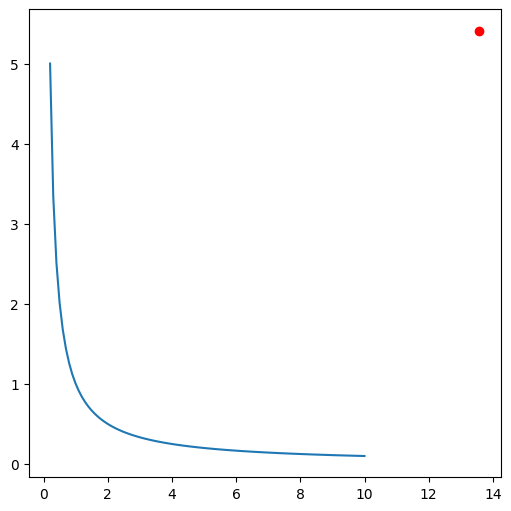

In [24]:
x_coord = np.linspace(0.2, 10, 100)
y_coord = 1/x_coord
plt.figure(figsize=(5, 5), layout='constrained')
plt.plot(x_coord, y_coord)
plt.plot(Xi, Ksi, 'ro')

## Критерий устойчивости Михайлова

### Для САР 3-го порядка имеем уравнение вида: -iA3w**3 + A2w**2 - iA1w + A0